<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=152949775" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.9 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=2f9edbcaa42e1241d98cae55c98fd1d0f84c35c48de50facf91692d4c62e3169
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

In [3]:
# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158740,1.818886,0.119262,1.897054,14.116284,12.507700,14.599711,17.558491,2.298407,0.637006,...,0.139145,4.185083,3.876503,3.966028,3.762837,0.430112,6.332444,0.455732,0.937305,0.000663
2014-11-25,12.043664,1.819000,0.119659,1.901508,14.117456,12.536122,14.639032,17.609488,2.300736,0.638923,...,0.138815,4.219582,3.876824,3.978990,3.763250,0.430410,6.362654,0.456403,0.940725,0.000661
2014-11-26,12.044823,1.817974,0.119893,1.907327,14.106088,12.535146,14.672531,17.641253,2.297930,0.640013,...,0.138703,4.223000,3.874767,3.999798,3.759318,0.430852,6.384001,0.456582,0.942102,0.000660
2014-11-27,12.057594,1.823948,0.119975,1.903120,14.143979,12.473378,14.664958,17.626882,2.303425,0.638722,...,0.139076,4.219061,3.885175,3.987364,3.769416,0.431614,6.411595,0.457808,0.944632,0.000662
2014-11-28,12.072534,1.829046,0.119492,1.909389,14.198653,12.434104,14.705828,17.678206,2.311214,0.640540,...,0.139819,4.241569,3.899979,3.997369,3.783482,0.432490,6.396366,0.458317,0.948537,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-25,14.062707,2.742933,0.142827,2.047362,21.356167,15.662524,24.194231,23.345975,2.988516,0.957773,...,0.074860,5.356719,5.867079,4.708357,5.697409,0.605334,0.740449,0.678490,0.583980,0.000882
2023-11-26,14.064590,2.743300,0.142845,2.047525,21.355047,15.663594,24.205237,23.347992,2.988566,0.957789,...,0.074856,5.356438,5.866771,4.708110,5.697110,0.605302,0.740410,0.678455,0.583950,0.000882
2023-11-27,14.080361,2.740436,0.143406,2.046457,21.346596,15.669031,24.232443,23.362727,2.986131,0.963585,...,0.074767,5.351365,5.864449,4.705314,5.694855,0.605405,0.740117,0.678186,0.583719,0.000882


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== THB ========================================
2023-11-30 01:45:39,715 - Unknown integration target: 
2023-11-30 01:45:47,806 - Unknown integration target: 
2023-11-30 01:45:56,220 - Unknown integration target: 
2023-11-30 01:46:04,304 - Unknown integration target: 
2023-11-30 01:46:12,397 - Unknown integration target: 
2023-11-30 01:46:30,221 - Unknown integration target: 
2023-11-30 01:46:47,995 - Unknown integration target: 
2023-11-30 01:47:06,010 - Unknown integration target: 
2023-11-30 01:47:08,499 - Unknown integration target: 
2023-11-30 01:47:08,503 - Unknown integration target: 
2023-11-30 01:47:16,797 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.6 MiB, max: 263.3 MiB
2023-11-30 01:47:16,803 - ApiComposer - Initial pipeline was fitted in 5.8 sec.
2023-11-30 01:47:16,808 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-30 02:09:34,768 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [22:17<?, ?gen/s]

2023-11-30 02:09:34,797 - ApiComposer - Hyperparameters tuning started with 18 min. timeout


2023-11-30 02:09:42,596 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, stl_arima, data_source_ts/THB]}
ridge - {'alpha': 8.086340723059845}
stl_arima - {}
data_source_ts/THB - {} 
Initial metric: 0.002
  0%|          | 134/100000 [16:29<221:28:12,  7.98s/trial, best loss: 0.0018349137312863475]
2023-11-30 02:27:26,850 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, stl_arima, data_source_ts/THB]}
ridge - {'alpha': 8.086340723059845}
stl_arima - {}
data_source_ts/THB - {}
2023-11-30 02:27:26,855 - PipelineTuner - Final metric: 0.002
2023-11-30 02:27:26,863 - ApiComposer - Hyperparameters tuning finished
2023-11-30 02:27:27,292 - ApiComposer - Model generation finished
2023-11-30 02:27:32,520 - FEDOT logger - Final pipeline was fitted
2023-11-30 02:27:32,526 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, stl_arima, data_source_ts/THB]}
ridge - {'alpha': 8.086340723059845}
stl_arima - {}
data_source_

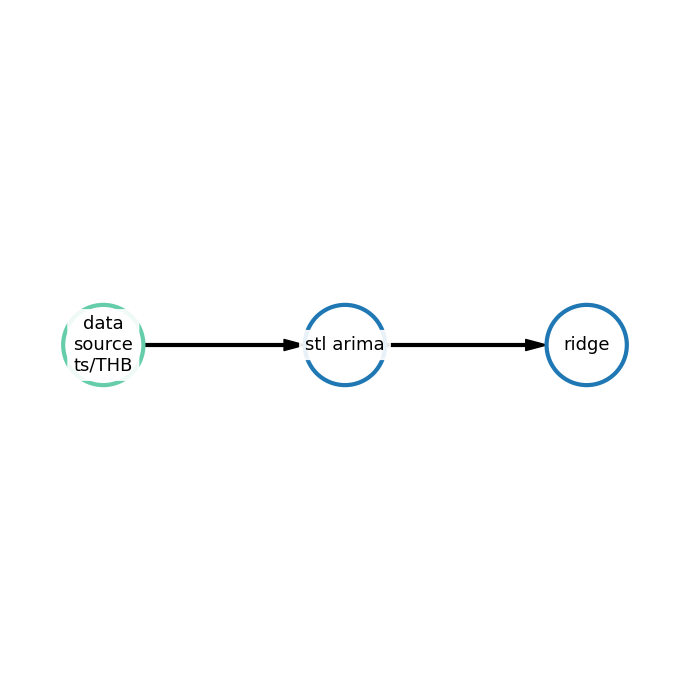

[0.57875612 0.57881987 0.57888131 0.57893967 0.57899729 0.57904902
 0.57910066 0.5791513  0.57919688 0.57923759]
{'mae': 0.005, 'mape': 0.009}


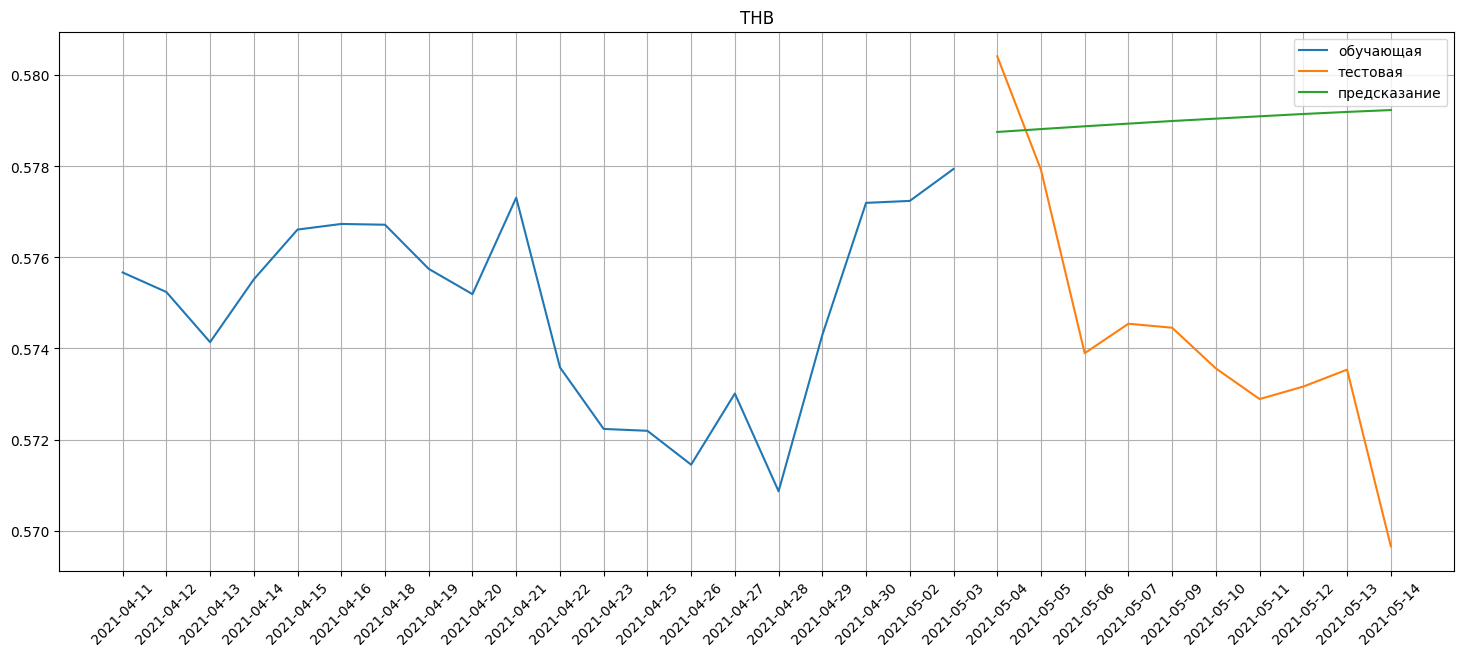


======================================== KRW ========================================
2023-11-30 02:28:05,505 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.5 MiB
2023-11-30 02:28:05,509 - ApiComposer - Initial pipeline was fitted in 10.9 sec.
2023-11-30 02:28:05,515 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-30 02:28:05,539 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 24 min. Set of candidate models: ['smoothing', 'stl_arima', 'polyfit', 'diff_filter', 'locf', 'ar', 'sparse_lagged', 'arima', 'gaussian_filter', 'cut', 'clstm', 'ts_naive_average', 'ets', 'lagged', 'glm', 'stl_arima', 'poly_features', 'locf', 'ransac_lin_reg', 'fast_ica', 'cut', 'treg', 'ts_naive_average', 'svr', 'lagged', 'scaling', 'smoothing', 'sgdr', 'normalization', 'arima', 'pca', 'ets', 'diff_filter', 'isolation_forest_reg', 'ar', 'rfr', 'dtreg', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-30 02:42:33,664 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [14:28<?, ?gen/s]

2023-11-30 02:42:33,694 - ApiComposer - Hyperparameters tuning started with 9 min. timeout


2023-11-30 02:43:14,066 - PipelineTuner - Initial pipeline: {'depth': 7, 'length': 8, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/KRW, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KRW - {}
lagged - {'window_size': 11.122208797127016}
linear - {}
decompose - {} 
Initial metric: 0.000
  0%|          | 13/100000 [02:14<1249:37:45, 44.99s/trial, best loss: 2.3065968155230997e-05]
2023-11-30 02:52:50,394 - PipelineTuner - Final pipeline: {'depth': 7, 'length': 8, 'nodes': [lgbmreg, ridge, ridge, glm, data_source_ts/KRW, lagged, linear, decompose]}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KRW - {}
la

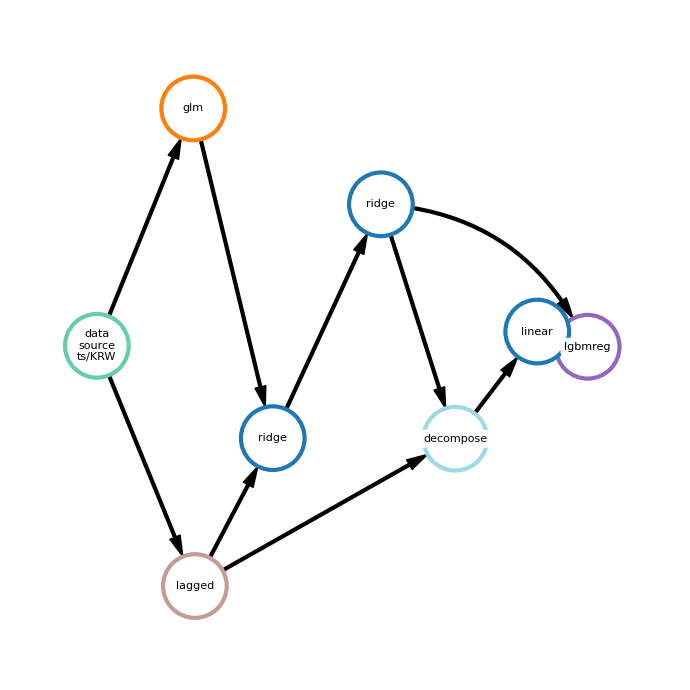

[0.01559968 0.01558769 0.01558724 0.01559911 0.01560925 0.01562362]
{'mae': 0.0, 'mape': 0.003}


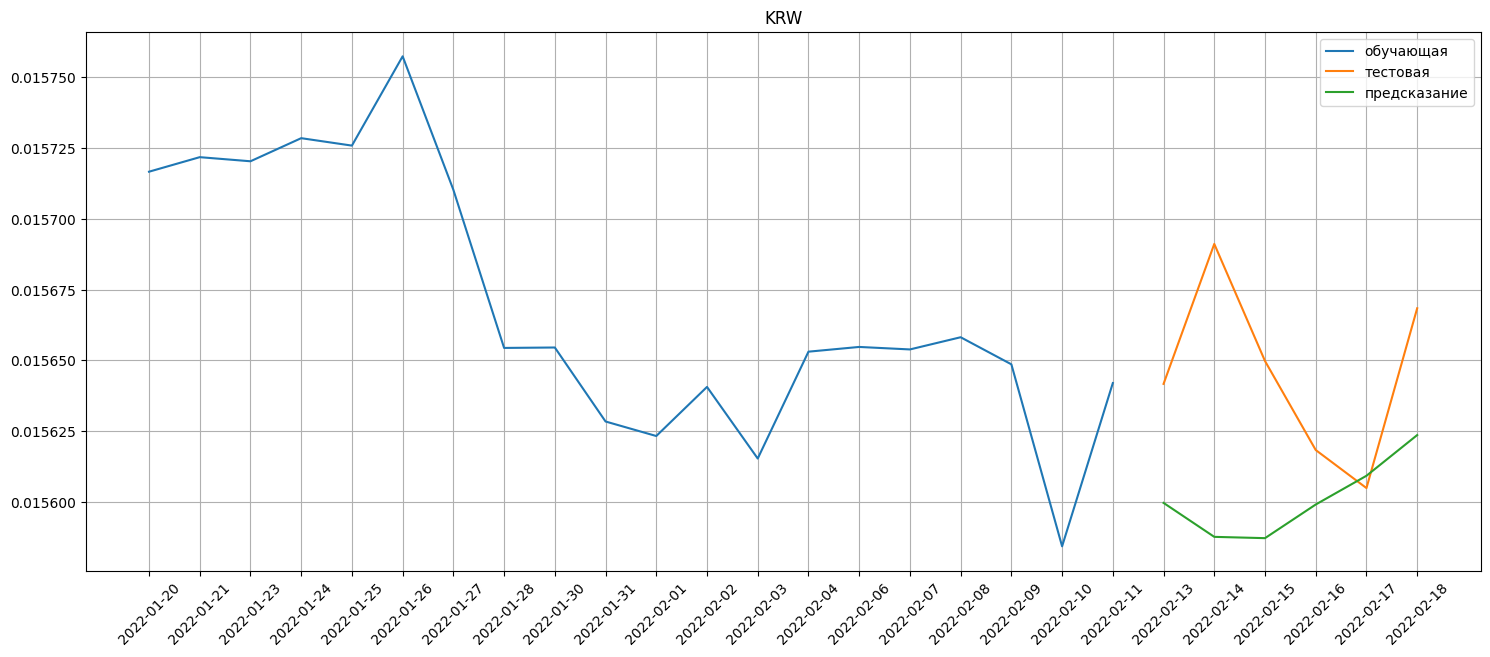


======================================== AUD ========================================
2023-11-30 02:53:44,495 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.9 MiB
2023-11-30 02:53:44,501 - ApiComposer - Initial pipeline was fitted in 10.0 sec.
2023-11-30 02:53:44,508 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-30 02:53:44,541 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 53 min. Set of candidate models: ['smoothing', 'stl_arima', 'polyfit', 'diff_filter', 'locf', 'ar', 'sparse_lagged', 'arima', 'gaussian_filter', 'cut', 'clstm', 'ts_naive_average', 'ets', 'lagged', 'glm', 'stl_arima', 'poly_features', 'locf', 'ransac_lin_reg', 'fast_ica', 'cut', 'treg', 'ts_naive_average', 'svr', 'lagged', 'scaling', 'smoothing', 'sgdr', 'normalization', 'arima', 'pca', 'ets', 'diff_filter', 'isolation_forest_reg', 'ar', 'rfr', 'dtreg', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-30 03:10:18,812 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [16:34<?, ?gen/s]

2023-11-30 03:10:18,842 - ApiComposer - Hyperparameters tuning started with 36 min. timeout


2023-11-30 03:10:45,485 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/AUD, ridge, lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/AUD - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.049
  0%|          | 67/100000 [31:47<928:55:12, 33.46s/trial, best loss: 0.052867379034312975] 
2023-11-30 03:47:39,360 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/AUD, ridge, lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/AUD - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-30 03:47:39,363 - PipelineTuner - Final metric: 0.049
2023-11-30 03:47:39,368 - ApiComposer - Hyperparameters tuning finished
2023-11-30 03:47:39,784 - ApiComposer - Model ge

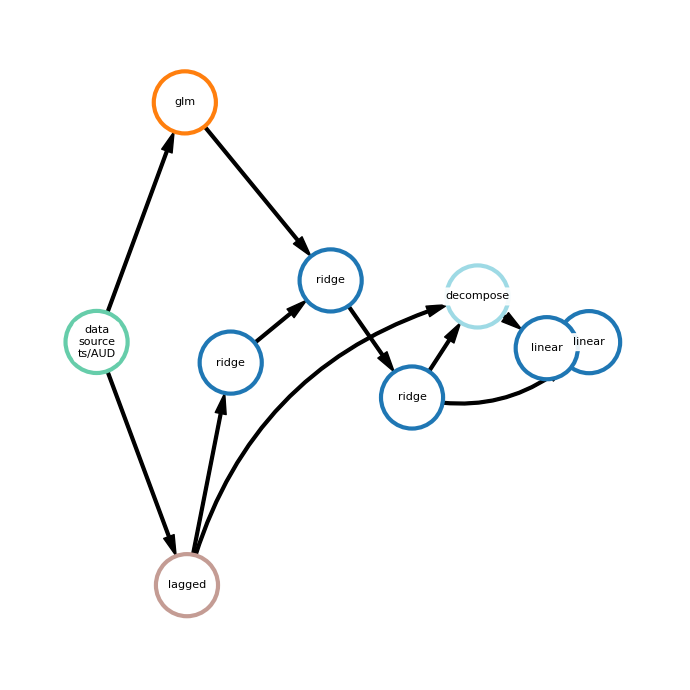

[13.42406368 13.41893387 13.43235338 13.42625666 13.43092346 13.427742
 13.41090393 13.41750717 13.41430664 13.42280579 13.40789032 13.43991852
 13.44068527 13.42586517 13.41103268 13.43527985 13.4126358 ]
{'mae': 0.126, 'mape': 0.009}


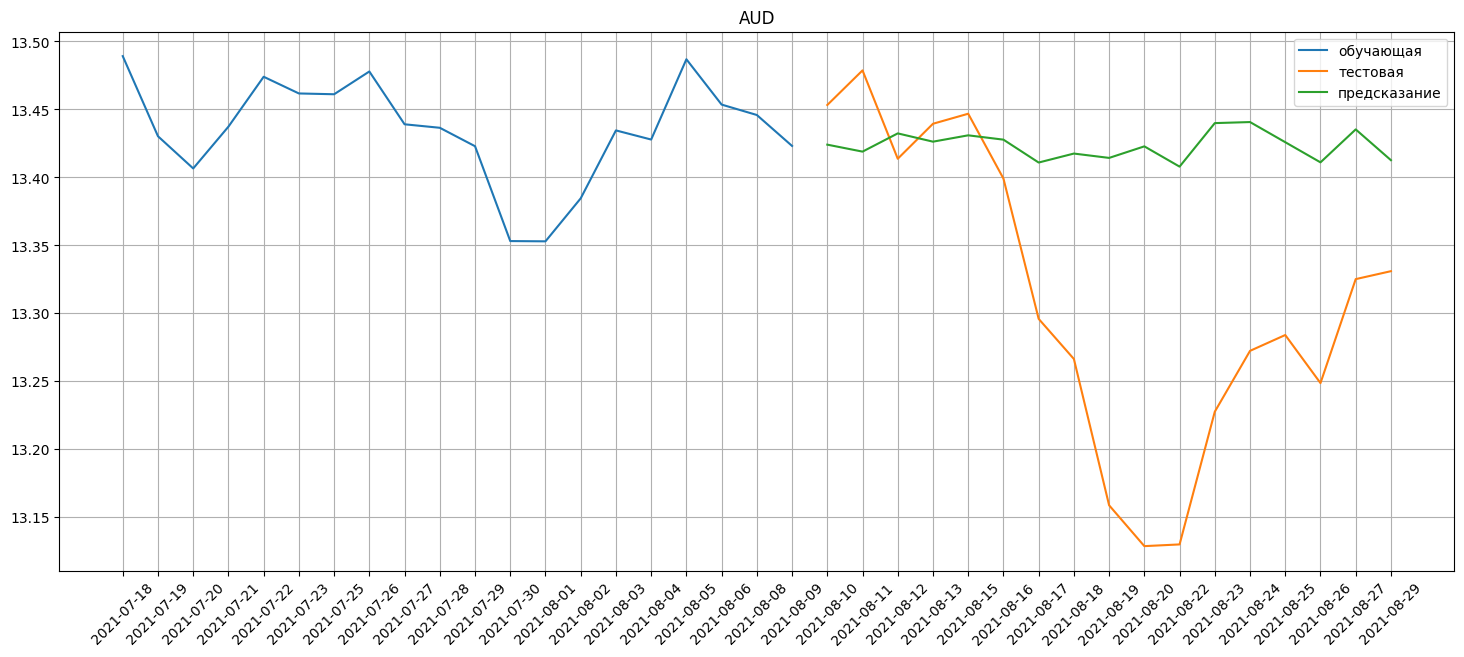


======================================== PEN ========================================
2023-11-30 03:48:24,660 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.0 MiB
2023-11-30 03:48:24,665 - ApiComposer - Initial pipeline was fitted in 8.0 sec.
2023-11-30 03:48:24,670 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-30 03:48:24,708 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 18 min. Set of candidate models: ['smoothing', 'stl_arima', 'polyfit', 'diff_filter', 'locf', 'ar', 'sparse_lagged', 'arima', 'gaussian_filter', 'cut', 'clstm', 'ts_naive_average', 'ets', 'lagged', 'glm', 'stl_arima', 'poly_features', 'locf', 'ransac_lin_reg', 'fast_ica', 'cut', 'treg', 'ts_naive_average', 'svr', 'lagged', 'scaling', 'smoothing', 'sgdr', 'normalization', 'arima', 'pca', 'ets', 'diff_filter', 'isolation_forest_reg', 'ar', 'rfr', 'dtreg', 'e

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-30 03:57:37,855 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [09:13<?, ?gen/s]

2023-11-30 03:57:37,880 - ApiComposer - Hyperparameters tuning started with 9 min. timeout


2023-11-30 03:57:55,525 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, lgbmreg, glm, data_source_ts/PEN, treg, lagged]}
ridge - {}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PEN - {}
treg - {}
lagged - {'window_size': 10} 
Initial metric: 0.028
  0%|          | 26/100000 [05:37<586:16:38, 21.11s/trial, best loss: 0.016466232111194853]
2023-11-30 04:06:45,701 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, lgbmreg, glm, data_source_ts/PEN, treg, lagged]}
ridge - {'alpha': 2.0756147748480744}
lgbmreg - {'num_leaves': 74, 'colsample_bytree': 0.9857746723319253, 'subsample': 0.413792562286849, 'subsample_freq': 10, 'learning_rate': 0.03189050305833336, 'n_estimators': 100, 'reg_alpha': 1.746886902466169e-06, 'reg_lambda': 0.004500827370449267}
glm - {'family': 'gaussian', '

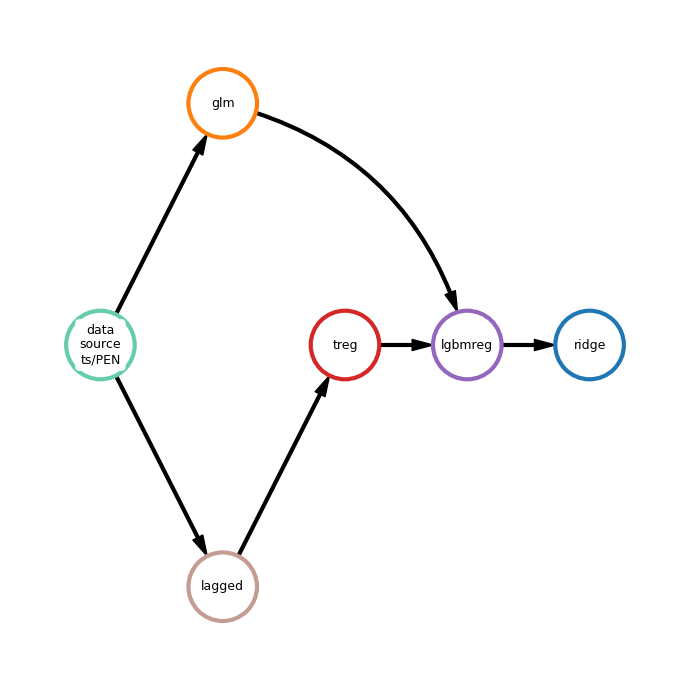

[4.9534748  4.95309459 4.95267769 4.95226637 4.95187279 4.95140198
 4.95087497 4.95035217 4.94986823 4.94956453 4.94941343 4.94947323]
{'mae': 0.017, 'mape': 0.003}


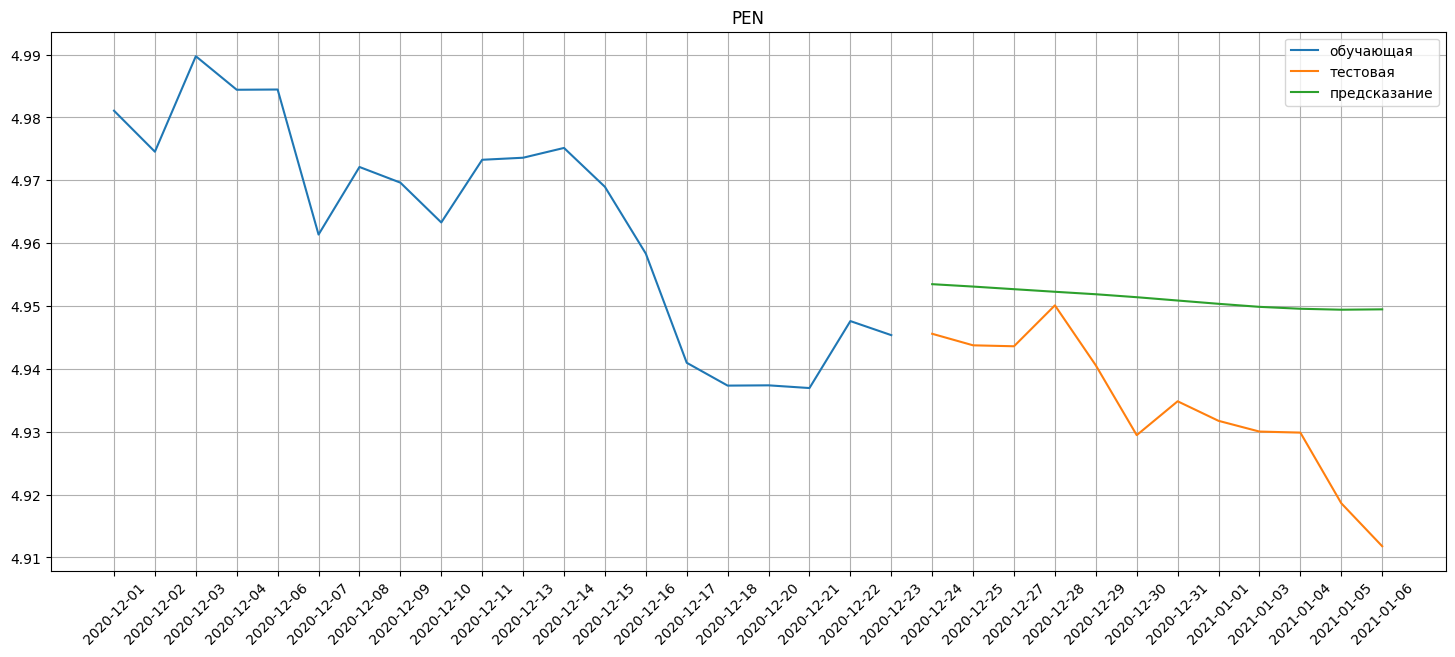


======================================== TRY ========================================
2023-11-30 04:07:27,048 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.1 MiB
2023-11-30 04:07:27,055 - ApiComposer - Initial pipeline was fitted in 19.0 sec.
2023-11-30 04:07:27,059 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-30 04:07:27,081 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 33 min. Set of candidate models: ['smoothing', 'stl_arima', 'polyfit', 'diff_filter', 'locf', 'ar', 'sparse_lagged', 'arima', 'gaussian_filter', 'cut', 'clstm', 'ts_naive_average', 'ets', 'lagged', 'glm', 'stl_arima', 'poly_features', 'locf', 'ransac_lin_reg', 'fast_ica', 'cut', 'treg', 'ts_naive_average', 'svr', 'lagged', 'scaling', 'smoothing', 'sgdr', 'normalization', 'arima', 'pca', 'ets', 'diff_filter', 'isolation_forest_reg', 'ar', 'rfr', 'dtreg', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-30 04:26:19,051 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [18:51<?, ?gen/s]

2023-11-30 04:26:19,073 - ApiComposer - Hyperparameters tuning started with 14 min. timeout


2023-11-30 04:26:33,448 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/TRY, ridge, lagged]}
ridge - {}
ridge - {'alpha': 6.9068985334518}
glm - {'family': 'gaussian', 'link': 'inverse_power'}
data_source_ts/TRY - {}
ridge - {'alpha': 6.794144823363889}
lagged - {'window_size': 10} 
Initial metric: 0.003
  0%|          | 47/100000 [10:59<494:58:15, 17.83s/trial, best loss: 0.0025189794463836724]
2023-11-30 04:40:28,097 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, ridge, glm, data_source_ts/TRY, ridge, lagged]}
ridge - {'alpha': 5.096636034152962}
ridge - {'alpha': 6.9068985334518}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/TRY - {}
ridge - {'alpha': 6.794144823363889}
lagged - {'window_size': 10}
2023-11-30 04:40:28,103 - PipelineTuner - Final metric: 0.003
2023-11-30 04:40:28,110 - ApiComposer - Hyperparameters tuning finished
2023-11-30 04:40:28,527 - ApiCompose

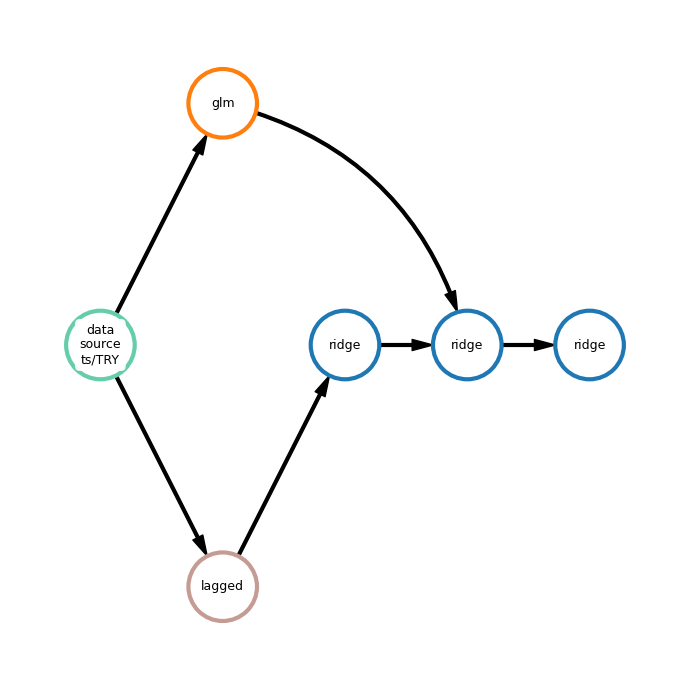

[0.7715741  0.77045968 0.76933723 0.7681798  0.76701196 0.76583542
 0.76466099]
{'mae': 0.006, 'mape': 0.008}


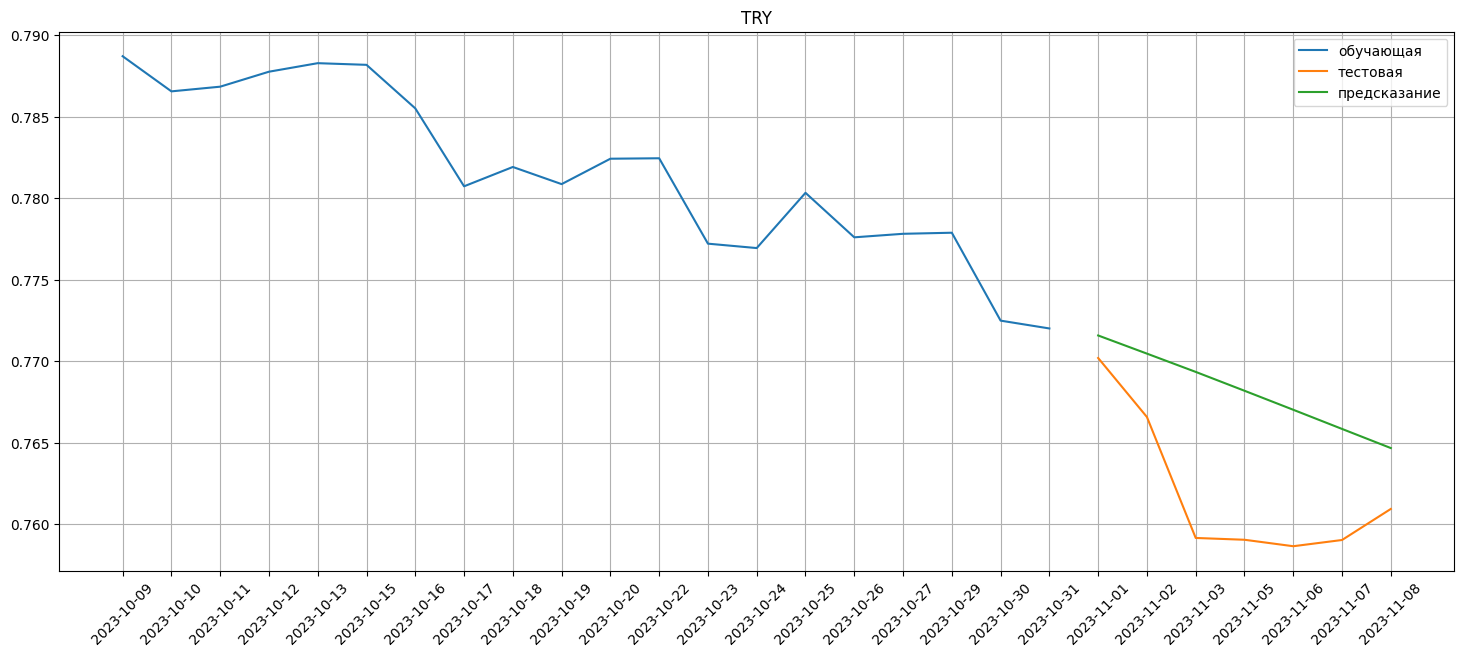


======================================== INR ========================================
2023-11-30 04:40:58,795 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.7 MiB
2023-11-30 04:40:58,801 - ApiComposer - Initial pipeline was fitted in 7.9 sec.
2023-11-30 04:40:58,805 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-30 04:40:58,842 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 12 min. Set of candidate models: ['smoothing', 'ets', 'polyfit', 'ar', 'locf', 'sparse_lagged', 'gaussian_filter', 'cut', 'ts_naive_average', 'diff_filter', 'lagged', 'glm', 'ar', 'locf', 'ransac_lin_reg', 'rfr', 'dtreg', 'cut', 'ts_naive_average', 'ransac_non_lin_reg', 'ridge', 'lagged', 'glm', 'scaling', 'smoothing', 'polyfit', 'diff_filter', 'sgdr', 'normalization', 'linear', 'lasso', 'sparse_lagged', 'adareg', 'gaussian_filter', 'pca', 'ets'].
2023-11-30

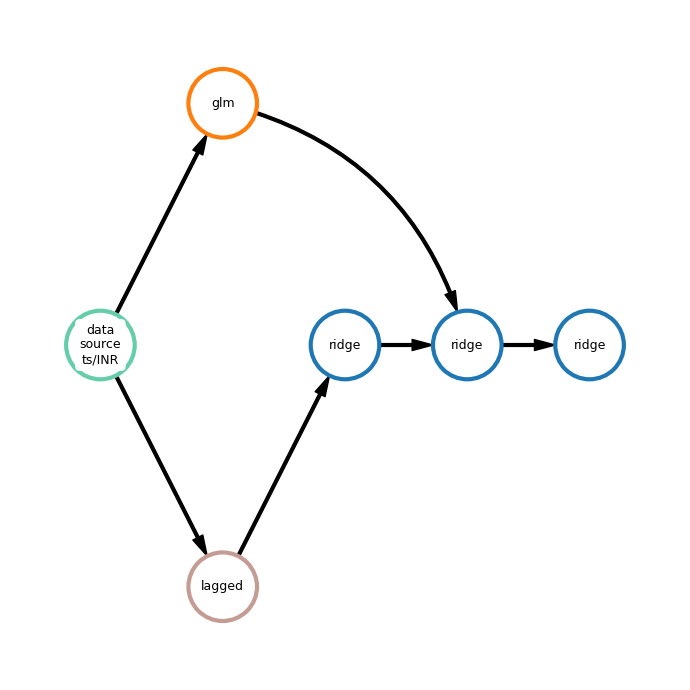

[0.24675345 0.24676206 0.24676998 0.24677696 0.24678394 0.24679054
 0.24679722 0.24680408 0.24681051 0.24681697 0.24682395 0.24683129
 0.24683857 0.24684548 0.24685248 0.24686018 0.24686757 0.24687417]
{'mae': 0.005, 'mape': 0.02}


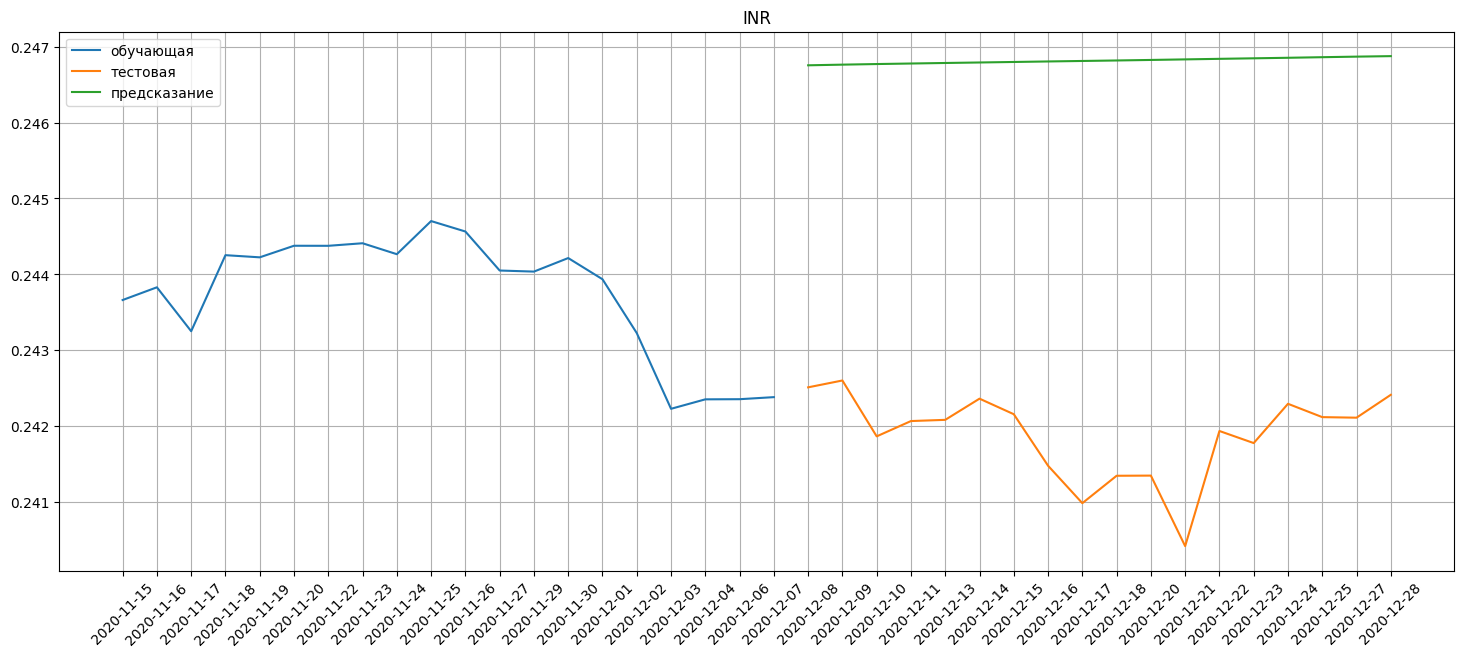


======================================== MXN ========================================
2023-11-30 04:53:22,726 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.2 MiB
2023-11-30 04:53:22,731 - ApiComposer - Initial pipeline was fitted in 8.1 sec.
2023-11-30 04:53:22,738 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-30 04:53:22,776 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 13 min. Set of candidate models: ['smoothing', 'ets', 'polyfit', 'ar', 'locf', 'sparse_lagged', 'gaussian_filter', 'cut', 'ts_naive_average', 'diff_filter', 'lagged', 'glm', 'ar', 'locf', 'ransac_lin_reg', 'rfr', 'dtreg', 'cut', 'ts_naive_average', 'ransac_non_lin_reg', 'ridge', 'lagged', 'glm', 'scaling', 'smoothing', 'polyfit', 'diff_filter', 'sgdr', 'normalization', 'linear', 'lasso', 'sparse_lagged', 'adareg', 'gaussian_filter', 'pca', 'ets'].
2023-11-30

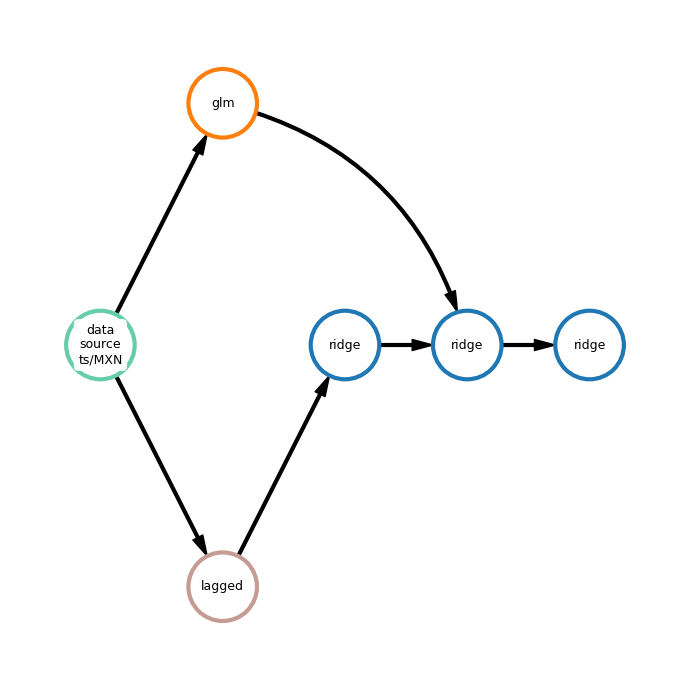

[0.89475418 0.89454097 0.89432874 0.89411477 0.89390192 0.89368622
 0.89346807 0.89325453 0.89303919 0.89281943 0.89258715 0.89235332
 0.89212266 0.89188385]
{'mae': 0.005, 'mape': 0.006}


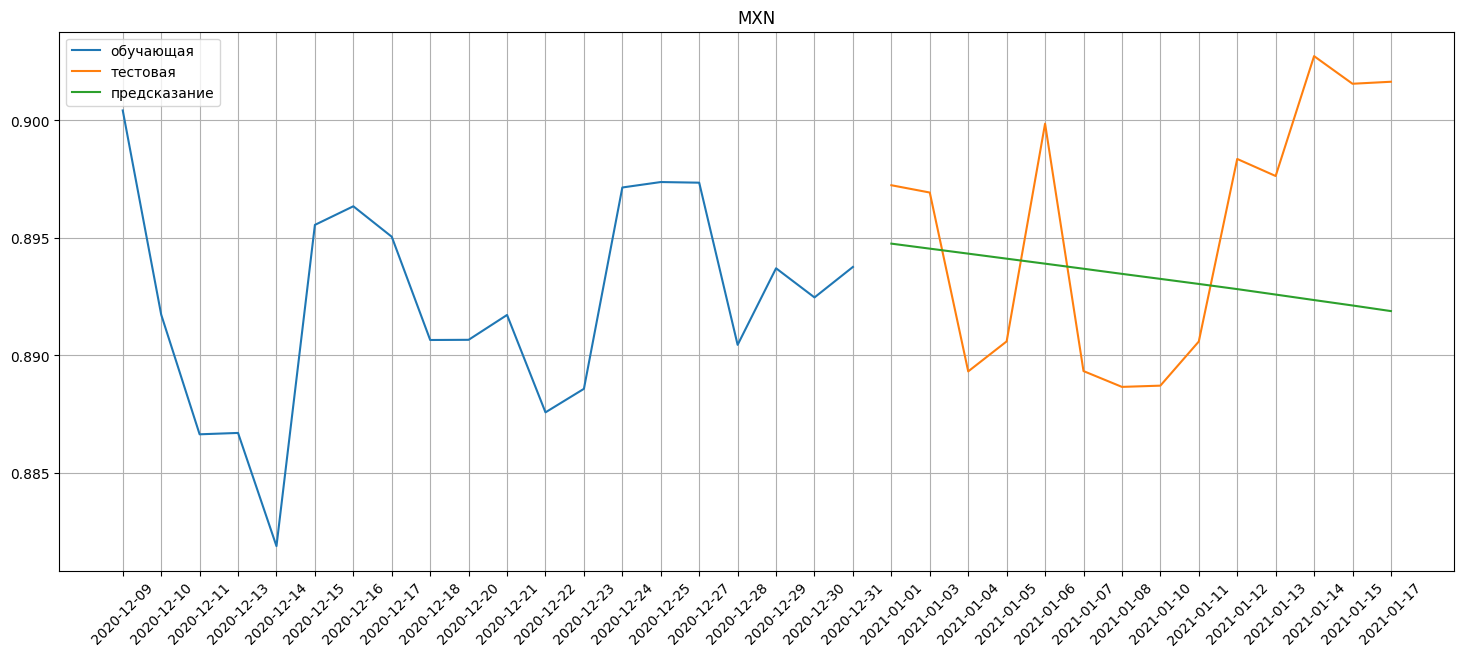


======================================== DKK ========================================
2023-11-30 05:06:53,548 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.2 MiB
2023-11-30 05:06:53,553 - ApiComposer - Initial pipeline was fitted in 16.0 sec.
2023-11-30 05:06:53,557 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-30 05:06:53,587 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 41 min. Set of candidate models: ['smoothing', 'stl_arima', 'polyfit', 'diff_filter', 'locf', 'ar', 'sparse_lagged', 'arima', 'gaussian_filter', 'cut', 'clstm', 'ts_naive_average', 'ets', 'lagged', 'glm', 'stl_arima', 'poly_features', 'locf', 'ransac_lin_reg', 'fast_ica', 'cut', 'treg', 'ts_naive_average', 'svr', 'lagged', 'scaling', 'smoothing', 'sgdr', 'normalization', 'arima', 'pca', 'ets', 'diff_filter', 'isolation_forest_reg', 'ar', 'rfr', 'dtreg', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-30 05:30:49,474 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [23:55<?, ?gen/s]

2023-11-30 05:30:49,504 - ApiComposer - Hyperparameters tuning started with 17 min. timeout


2023-11-30 05:31:10,891 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, ridge, glm, data_source_ts/DKK, lgbmreg, lagged]}
ridge - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/DKK - {}
lgbmreg - {'num_leaves': 169, 'colsample_bytree': 0.8925555276415675, 'subsample': 0.5283460039477264, 'subsample_freq': 10, 'learning_rate': 0.027329629651323115, 'n_estimators': 100, 'reg_alpha': 1.0627229665101454e-05, 'reg_lambda': 0.00013700605059403076}
lagged - {'window_size': 10} 
Initial metric: 0.008
  0%|          | 37/100000 [12:46<787:57:13, 28.38s/trial, best loss: 0.007586505737163941]
2023-11-30 05:48:12,065 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, ridge, ridge, glm, data_source_ts/DKK, lgbmreg, lagged]}
ridge - {'alpha': 7.718237648909452}
ridge - {'alpha': 1.7045405118294115}
ridge - {'alpha': 1.6591693838868429}
glm - {'family': 'gaussian', 'link': 'log'}
data_source_ts/

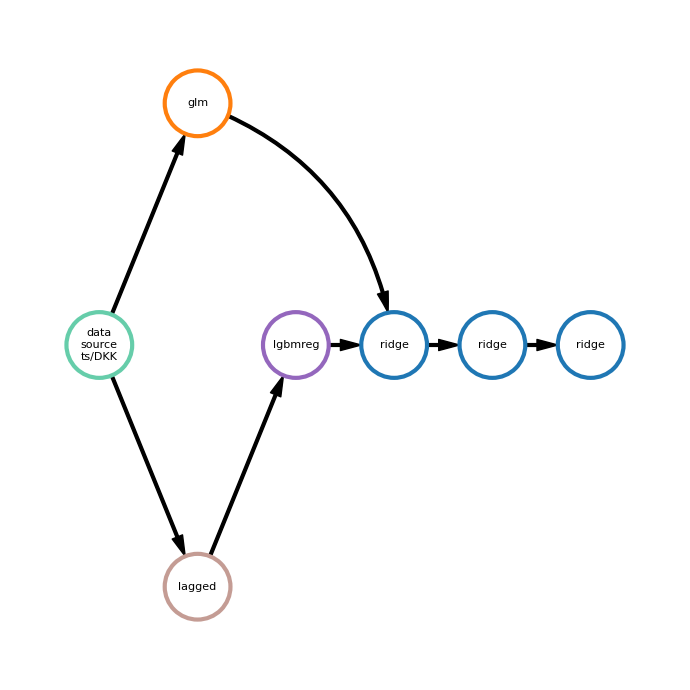

[3.02991029 3.03019071 3.03043573 3.03066026 3.03084005 3.03098346
 3.03107676 3.03113081]
{'mae': 0.007, 'mape': 0.002}


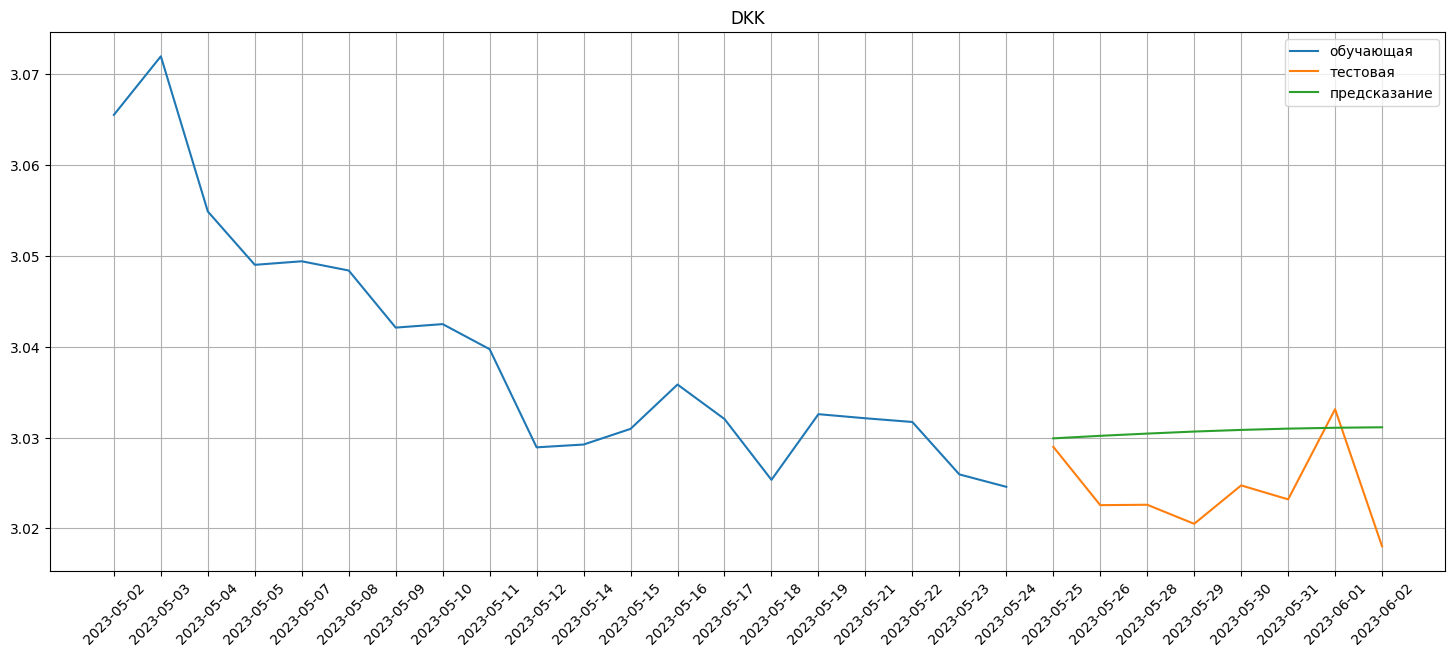


======================================== PKR ========================================
2023-11-30 05:48:54,572 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.6 MiB
2023-11-30 05:48:54,577 - ApiComposer - Initial pipeline was fitted in 12.9 sec.
2023-11-30 05:48:54,594 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-30 05:48:54,633 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 48 min. Set of candidate models: ['smoothing', 'stl_arima', 'polyfit', 'diff_filter', 'locf', 'ar', 'sparse_lagged', 'arima', 'gaussian_filter', 'cut', 'clstm', 'ts_naive_average', 'ets', 'lagged', 'glm', 'stl_arima', 'poly_features', 'locf', 'ransac_lin_reg', 'fast_ica', 'cut', 'treg', 'ts_naive_average', 'svr', 'lagged', 'scaling', 'smoothing', 'sgdr', 'normalization', 'arima', 'pca', 'ets', 'diff_filter', 'isolation_forest_reg', 'ar', 'rfr', 'dtreg', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-30 06:05:53,287 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [16:58<?, ?gen/s]

2023-11-30 06:05:53,318 - ApiComposer - Hyperparameters tuning started with 31 min. timeout


2023-11-30 06:06:05,364 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [svr, ridge, glm, data_source_ts/PKR, ridge, lagged]}
svr - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PKR - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 0.002
  0%|          | 147/100000 [28:53<350:52:00, 12.65s/trial, best loss: 0.0013192989217864297]
2023-11-30 06:36:59,260 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [svr, ridge, glm, data_source_ts/PKR, ridge, lagged]}
svr - {'C': 11.986318209322524, 'epsilon': 0.06080279907807583, 'loss': 'squared_epsilon_insensitive', 'tol': 0.006526580820791492}
ridge - {'alpha': 6.048359573602875}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/PKR - {}
ridge - {'alpha': 5.817098888235126}
lagged - {'window_size': 117}
2023-11-30 06:36:59,266 - PipelineTuner - Final metric: 0.001
2023-11-30 06:36:59,282 - ApiComposer - Hyperparameters tuning finished
202

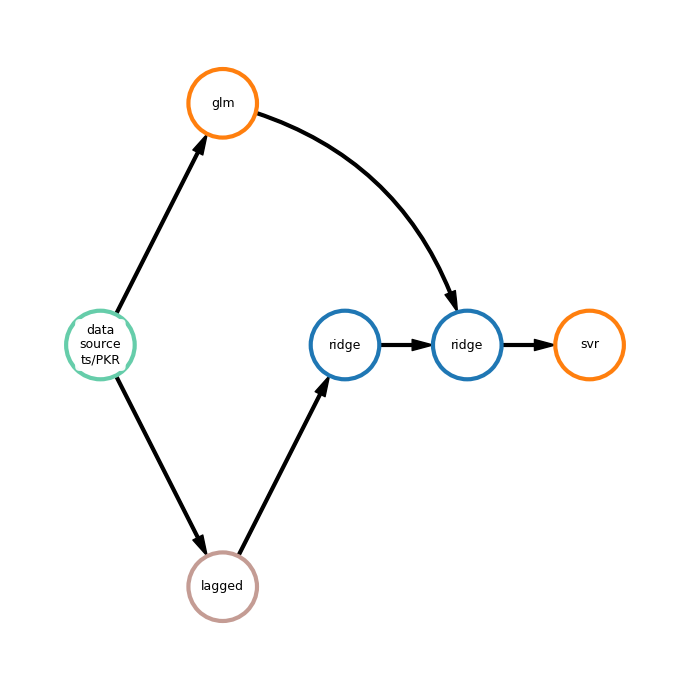

[0.09586537 0.09588088 0.09588734 0.0959373  0.09590597 0.09591301
 0.09585599 0.09589865 0.09593696 0.09596534 0.09597406 0.09595016]
{'mae': 0.001, 'mape': 0.014}


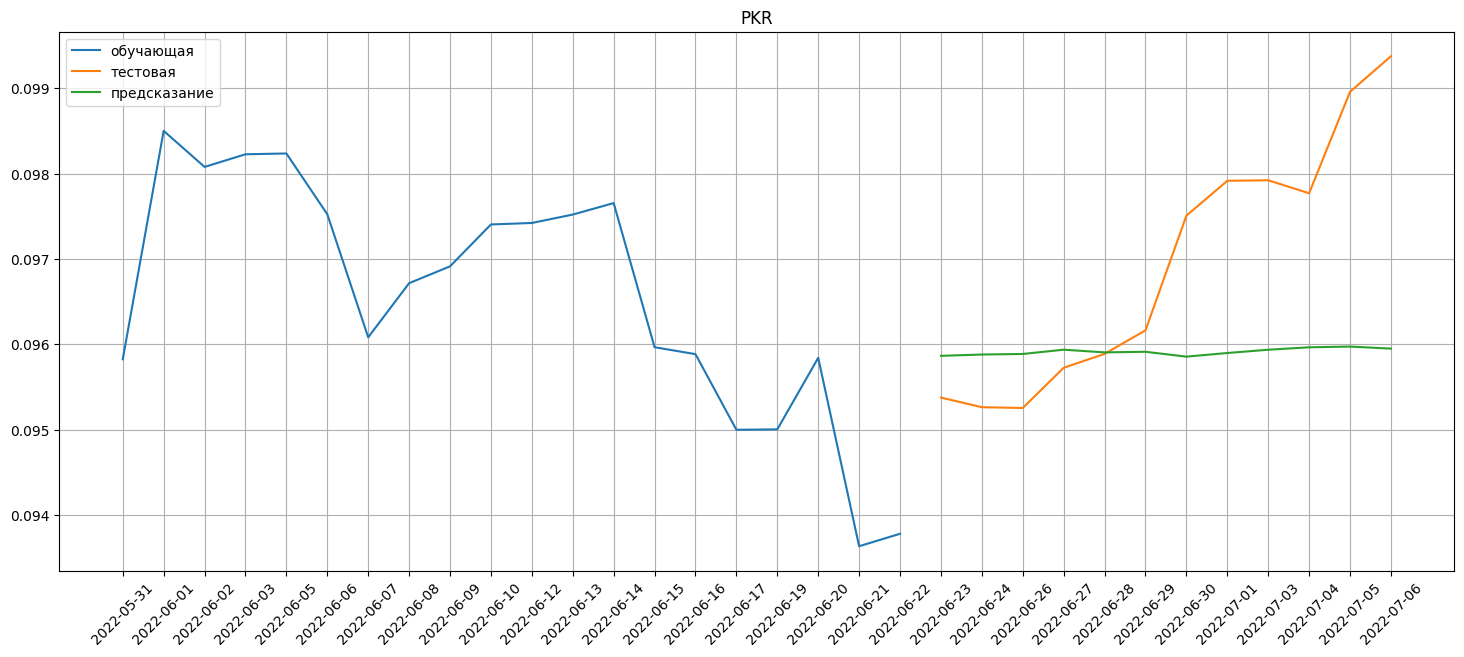


======================================== JPY ========================================
2023-11-30 06:37:27,944 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.7 MiB
2023-11-30 06:37:27,950 - ApiComposer - Initial pipeline was fitted in 12.7 sec.
2023-11-30 06:37:27,953 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-30 06:37:27,986 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 26 min. Set of candidate models: ['smoothing', 'stl_arima', 'polyfit', 'diff_filter', 'locf', 'ar', 'sparse_lagged', 'arima', 'gaussian_filter', 'cut', 'clstm', 'ts_naive_average', 'ets', 'lagged', 'glm', 'stl_arima', 'poly_features', 'locf', 'ransac_lin_reg', 'fast_ica', 'cut', 'treg', 'ts_naive_average', 'svr', 'lagged', 'scaling', 'smoothing', 'sgdr', 'normalization', 'arima', 'pca', 'ets', 'diff_filter', 'isolation_forest_reg', 'ar', 'rfr', 'dtreg', '

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-30 10:19:39,700 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [3:42:11<?, ?gen/s]

2023-11-30 10:19:39,728 - ApiComposer - Time for pipeline composing was 3:42:11.726887.
The remaining 196.4 seconds are not enough to tune the hyperparameters.
2023-11-30 10:19:39,732 - ApiComposer - Composed pipeline returned without tuning.


2023-11-30 10:19:40,152 - ApiComposer - Model generation finished
2023-11-30 10:20:16,901 - FEDOT logger - Final pipeline was fitted
2023-11-30 10:20:16,908 - FEDOT logger - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/JPY, ridge, lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/JPY - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
Memory consumption for finish in main session: current 1.1 MiB, max: 91.2 MiB


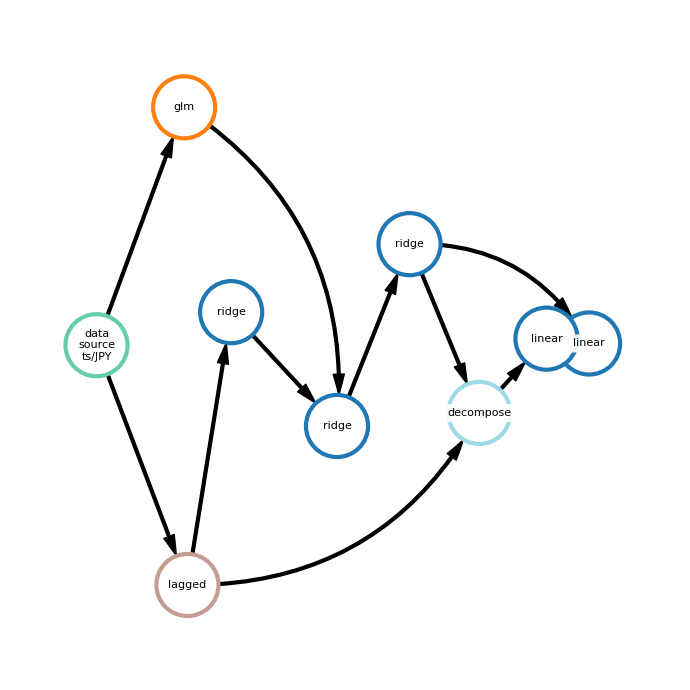

[0.14538902 0.14554119 0.14566302 0.14557052 0.14584351 0.14577866
 0.14579201 0.14574242 0.145998   0.14613152 0.14601898 0.14602947
 0.1462841 ]
{'mae': 0.001, 'mape': 0.008}


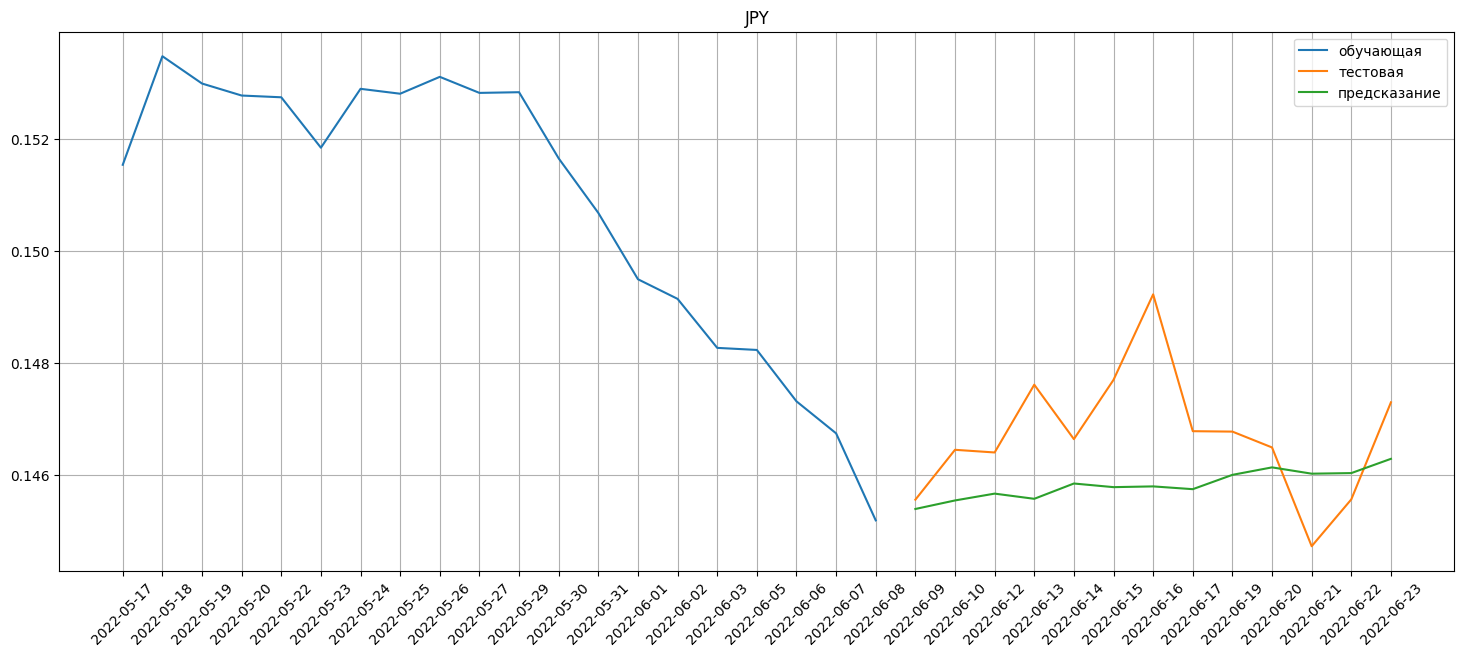

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
297,"(2023, 11, 30, 4, 40, 47, 3, 334, 0)",INR,18,915,12,0.020
298,"(2023, 11, 30, 4, 53, 14, 3, 334, 0)",MXN,14,898,13,0.006
299,"(2023, 11, 30, 5, 6, 37, 3, 334, 0)",DKK,8,155,41,0.002
300,"(2023, 11, 30, 5, 48, 37, 3, 334, 0)",PKR,12,439,48,0.014


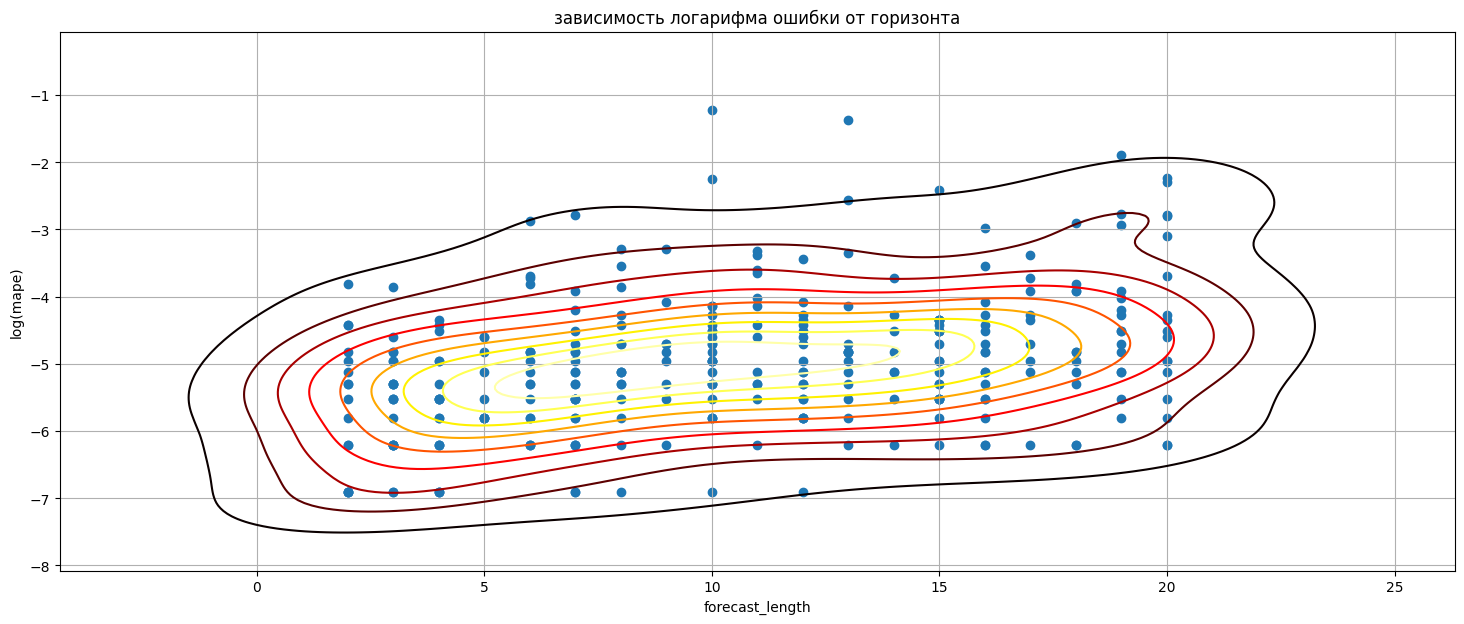

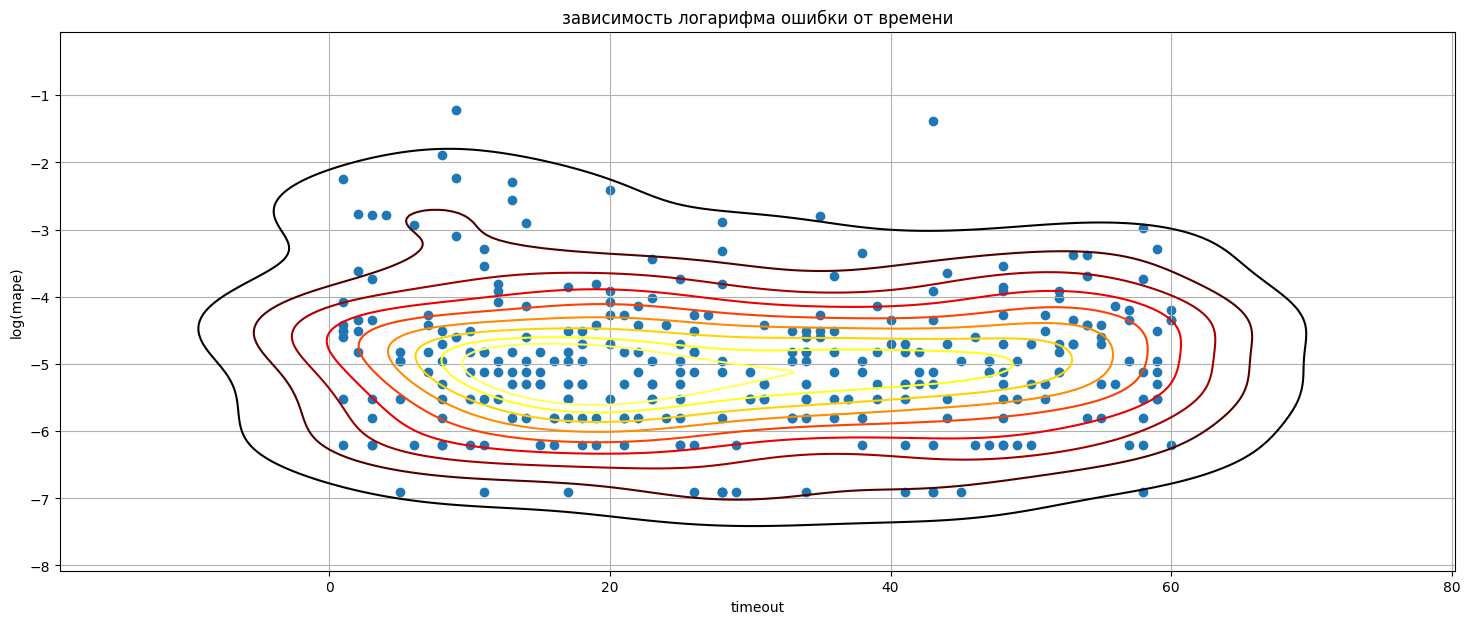

In [9]:
import seaborn as sns

rep['log(mape)'] = np.log(rep['mape'])

sns.kdeplot(data=rep,x='forecast_length',y='log(mape)',cmap='hot')
plt.scatter(rep['forecast_length'],rep['log(mape)'])
plt.ylabel('log(mape)')
plt.title('зависимость логарифма ошибки от горизонта')
plt.grid()
plt.show()

sns.kdeplot(data=rep,x='timeout',y='log(mape)',cmap='hot')
plt.scatter(rep['timeout'],rep['log(mape)'])
plt.ylabel('log(mape)')
plt.title('зависимость логарифма ошибки от времени')
plt.grid()
plt.show()